In [1]:
# Initial imports
import pandas as pd
from sklearn.cluster import KMeans

## Loading Scaled Customer Shopping Data into Pandas

In [2]:
# Load the data into a pandas DataFrame.
shopper_df = pd.read_csv("./Resources/customer-shopping-scaled.csv")

shopper_df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Method
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,Retail
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,Retail
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293,Retail
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411,HotelRestCafe
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347,Retail


In [3]:
# Use the encodeMethod helper function to encode Hotel/Restuarant/Cafe purchases to 1 and Retail purchases to 2.
def encodeMethod(purchase):
    """
    This function encodes the method of purchases to 1 for "HotelRestCafe"
    and 2 for "Retail".
    """
    if purchase == "HotelRestCafe":
        return 1
    else:
        return 2

In [4]:
# Edit the "Method" column using the encodeMethod function
shopper_df["Method"] = shopper_df["Method"].apply(encodeMethod)

# # Review the DataFrame
shopper_df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Method
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,2
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,2
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293,2
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411,1
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347,2


## Implementing the Elbow Method

In [5]:
# Create an empty list to store the inertia values
inertia = []

# Create a list with the number of k-values to try
k = list(range(1,11))
k

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [6]:
# Create a for loop to compute the inertia with each possible value of k and add the values to the inertia list.
for i in k:
    model=KMeans(n_clusters=i, n_init="auto", random_state=2)
    model.fit(shopper_df)
    inertia.append(model.inertia_)

In [7]:
inertia

[2736.1727272727267,
 2033.0085286613753,
 1723.9350085129445,
 1409.0566898488844,
 1102.3364032878135,
 994.8183159686496,
 883.3186192363329,
 813.5626967861176,
 766.2249618814844,
 675.1429439293474]

In [8]:
# Create a dictionary with the data to plot the elbow curve
elbow_data = {
    "k" : k,
    "inertia" : inertia
}


# Create a DataFrame with the data to plot the elbow curve
df = pd.DataFrame(elbow_data)

# Display the DataFrame
df

,k,inertia
0,1,2736.172727
1,2,2033.008529
2,3,1723.935009
3,4,1409.056690
4,5,1102.336403
5,6,994.818316
6,7,883.318619
7,8,813.562697
8,9,766.224962
9,10,675.142944


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

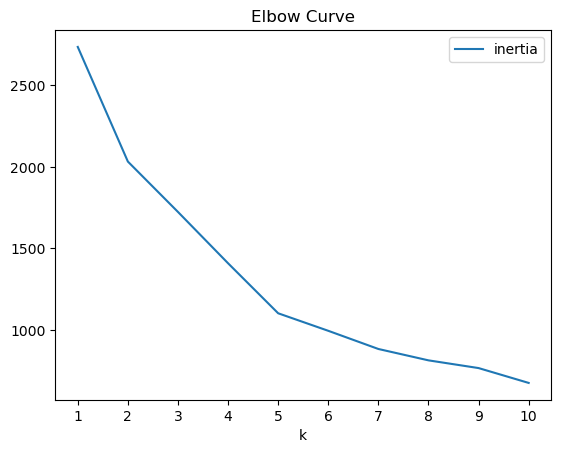

In [9]:
# Plot the Elbow curve
df.plot.line(x='k', y='inertia', title="Elbow Curve", xticks=k)

In [10]:
inertia

[2736.1727272727267,
 2033.0085286613753,
 1723.9350085129445,
 1409.0566898488844,
 1102.3364032878135,
 994.8183159686496,
 883.3186192363329,
 813.5626967861176,
 766.2249618814844,
 675.1429439293474]

In [11]:
(inertia[0] - inertia[1]) / inertia[0] * 100

25.698823455207396

In [12]:
k

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [13]:
# Determine the rate of decrease between each k value. 
for i in range(1, len(k)):
    percent_decrease = (inertia[i-1] - inertia[i]) / inertia[i-1] * 100
    print(f"Percentage decrease from k={k[i-1]} to k={k[i]}: {percent_decrease:.2f}%")

Percentage decrease from k=1 to k=2: 25.70%
Percentage decrease from k=2 to k=3: 15.20%
Percentage decrease from k=3 to k=4: 18.27%
Percentage decrease from k=4 to k=5: 21.77%
Percentage decrease from k=5 to k=6: 9.75%
Percentage decrease from k=6 to k=7: 11.21%
Percentage decrease from k=7 to k=8: 7.90%
Percentage decrease from k=8 to k=9: 5.82%
Percentage decrease from k=9 to k=10: 11.89%


 The rate of decrease in inertia **begins** to slow down between k=3 to k=4, which means that our elbow point is at k=4.

In [25]:
# Define the model with 4 clusters
model = KMeans(n_clusters=5, n_init='auto', random_state=2)

# Fit the model
model.fit(shopper_df)

# Make predictions
k_4 = model.predict(shopper_df)


# Create a copy of the DataFrame
customers_copy = shopper_df.copy()

# Add a class column with the labels
customers_copy['customer_segment'] = k_4

In [26]:
# Review the DataFrame
customers_copy.head(20)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Method,customer_segment
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,2,4
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,2,4
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293,2,4
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411,1,0
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347,2,2
5,-0.204806,0.334067,-0.297637,-0.496155,-0.228138,-0.026224,2,0
6,0.009950,-0.352316,-0.102849,-0.534512,0.054280,-0.347854,2,0
7,-0.349981,-0.113981,0.155359,-0.289315,0.092286,0.369601,2,4
8,-0.477901,-0.291409,-0.185336,-0.545854,-0.244726,-0.275079,1,0
9,-0.474497,0.718495,1.151423,-0.394488,0.954031,0.203461,2,4


<Axes: title={'center': 'Scatter Plot by Shopping Segment - k=5'}, xlabel='Frozen', ylabel='Grocery'>

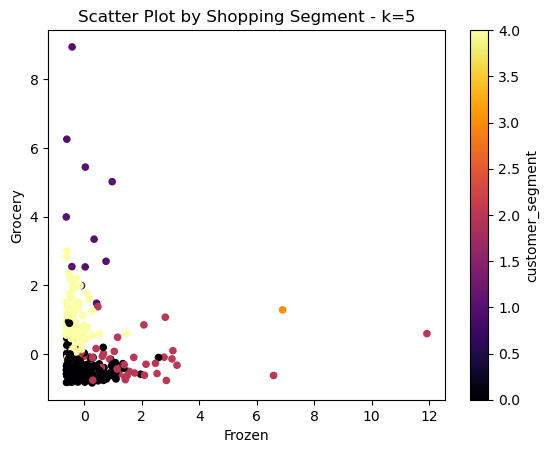

In [27]:
# Create a scatter plot with x="Frozen" and y="Grocery" with k=4 segments, use colormap='viridis'.
customers_copy.plot.scatter(x="Frozen", y="Grocery", 
                            c='customer_segment', 
                            title='Scatter Plot by Shopping Segment - k=5',
                           colormap='inferno')